# Proyek Analisis Data: BIKE-SHARING DATASET
- **Nama:** Silvi kusuma wardhani gunawan
- **Email:** silvikusuma043@gmail.com
- **ID Dicoding:** silvi-kusuma(3836348)

## Menentukan Pertanyaan Bisnis


- Berapa persentase jumlah total pengguna registered dan casual dari tahun 2011-2012?
- Bagaimana pengaruh hari kerja terhadap jumlah penyewaan sepeda pada tahun 2011-2012?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

## Data Wrangling

### Gathering Data

langkah pertama gathering data atau pengumpulan data dari data set saya mengimport dataset dari google drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
day_df = pd.read_csv("/content/drive/MyDrive/day.csv")
hour_df = pd.read_csv("/content/drive/MyDrive/hour.csv")

### Assesing data

langkah selanjutnya adalah assesing data dengan menilai apakah data berkualitas dan layak digunakan atau tidak


**ASSESING DATA DAY**

In [4]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


tampaknya ada sedikit kekeliruan dalam data type yaitu dteday yang harusnya tipe datanya datetime bukannya object karena merupakan tanggal

**lanjut memeriksa apakah ada data yang missing dalam data day**

In [5]:
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


tampaknya tidak ada missing ada di dalam data day


**selanjutnya cek apakah ada data yang duplikat dan meilhat parameter statistiknya**

In [6]:
print("Jumlah duplikasi: ",day_df.duplicated().sum())

Jumlah duplikasi:  0


In [7]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


untuk data duplikasi tidak ada di dataset ini dan untuk parameter statistiknya saya rasa sudah cukup baik dan sesuai

**ASSSESING DATA HOUR**

In [8]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


seperti yang tampak diatas bahwa dteday nya yang seharusnya tipe datanya datetime bukan object kesalahan ini sama dengan dataset day

**selanjutnya mencari missing data hour**

In [9]:
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


didalam hour juga tidak ada missing data

**selanjutnya mencari data duplikat dan melihat parameter statistik**

In [10]:
print("Jumlah duplikasi: ",hour_df.duplicated().sum())

Jumlah duplikasi:  0


In [11]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


tidak ada data duplikat dalam data hour dan parameternya tampak
baik



Insight:
- data dteday dalam data day perlu diganti data typenya menjadi datetime
- data dteday dalam data hour perlu diganti data typenya juga menjadi datetime

### Cleaning Data

**setelah menemukan kesalahan dan penilaian data dengan assesing sata selanjutnya melakukan cleaning data**

kesalahan yang ditemukan yaitu dteday dalam data day dan hour salah data typenya

In [12]:
datetime_columns = ["dteday"]

for column in datetime_columns:
  day_df[column] = pd.to_datetime(day_df[column])

In [13]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [14]:
datetime_columns = ["dteday"]

for column in datetime_columns:
  hour_df[column] = pd.to_datetime(hour_df[column])

In [15]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

cleaning data telah selesai dengan mengganti data type dteday dari tipe data object ke datetime di data day dan hour dengan selesainya data cleaning maka data telah dinyatakan bersih dan dapat dianalisis

Insight:

- mengganti data type dteday di data day menjadi datetime
- mengganti data type dteday di data hour menjadi datetime

## Exploratory Data Analysis (EDA)

pertanyaan
- Berapa persentase jumlah total pengguna registered dan casual dari tahun 2011-2012?
- Bagaimana pengaruh hari kerja terhadap jumlah penyewaan sepeda pada tahun 2011-2012?

### Explore data day

In [16]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


Dataset day mencakup 731 entri penyewaan sepeda dari 1 Januari 2011 hingga 31 Desember 2012. Rata-rata jumlah penyewaan sepeda per hari adalah sekitar 4,504, dengan pengguna registered (rata-rata 3,656) lebih banyak dibandingkan pengguna casual (rata-rata 848). Data menunjukkan variasi penyewaan berdasarkan musim, hari libur, dan kondisi cuaca, dengan cuaca baik dan suhu hangat berkontribusi pada peningkatan jumlah penyewaan.








In [18]:
usage = day_df.groupby(['season', 'holiday', 'workingday'])[['casual', 'registered']].sum().reset_index()
print(usage)

    season  holiday  workingday  casual  registered
0        1        0           0   30255       95613
1        1        0           1   28222      305443
2        1        1           0    2145        9670
3        2        0           0   99747      168592
4        2        0           1   97829      532784
5        2        1           0    5946       13691
6        3        0           0   98517      190708
7        3        0           1  118746      630327
8        3        1           0    8828       14003
9        4        0           0   65854      172548
10       4        0           1   58488      520571
11       4        1           0    5440       18712


Dari analisis distribusi penggunaan sepeda berdasarkan musim, hari libur, dan status hari kerja, dapat disimpulkan bahwa pengguna registered menunjukkan pola penggunaan yang lebih konsisten dan tinggi dibandingkan pengguna casual, terutama pada hari kerja dan di musim semi serta musim panas. Pengguna casual cenderung lebih aktif pada hari kerja dengan penurunan signifikan saat hari libur, menunjukkan preferensi yang lebih rendah untuk bersepeda di luar jam kerja. Secara keseluruhan, musim semi dan musim panas menjadi waktu yang paling produktif untuk penggunaan sepeda, dengan pengguna registered tetap aktif baik pada hari kerja maupun hari libur.

In [20]:
season_counts = day_df.groupby('season')[['casual', 'registered']].sum()
season_counts

,casual,registered
season,,
1,60622,410726
2,203522,715067
3,226091,835038
4,129782,711831


berdasarkan musim menunjukkan bahwa di musim semi (season 1), ada 60.622 pengguna casual dan 410.726 pengguna terdaftar. Saat musim panas (season 2), angka naik drastis dengan 203.522 pengguna casual dan 715.067 pengguna terdaftar, menunjukkan banyak orang suka bersepeda di cuaca hangat. Musim gugur (season 3) juga cukup ramai dengan 226.091 pengguna casual dan 835.038 pengguna terdaftar. Namun, di musim dingin (season 4), pengguna casual turun jadi 129.782, tapi pengguna terdaftar tetap tinggi di 711.831, yang menunjukkan kalau pengguna terdaftar lebih setia meskipun cuaca tidak mendukung.

In [21]:
day_counts = day_df.groupby('holiday')[['casual', 'registered']].sum()
day_counts

,casual,registered
holiday,,
0,597658,2616586
1,22359,56076


In [22]:
working_counts = day_df.groupby('workingday')[['casual', 'registered']].sum()
working_counts

,casual,registered
workingday,,
0,316732,683537
1,303285,1989125


In [23]:
weekday_counts = day_df.groupby('weekday')[['casual', 'registered']].sum()
weekday_counts

,casual,registered
weekday,,
0,140521,303506
1,70784,384719
2,57843,411266
3,57319,415729
4,61460,423935
5,78238,409552
6,153852,323955


**Insight:**
- penyewa paling banyak dan konsisten adalah penyewa dari registered
- penyewa sepeda paling banyak di musim panas
- penyewa sepeda cenderung menyewa sepeda dihari kerja dan di hari sabtu (hari ke 6 dari 1 minggu)

### Explore data hour

In [24]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


Dataset hour berisi 17.379 catatan penyewaan sepeda per jam dari tahun 2011 hingga 2012. Rata-rata total penyewaan sepeda (cnt) adalah 189, dengan 35 penyewaan dari pengguna casual dan 153 dari pengguna terdaftar. Variabel yang dianalisis mencakup tanggal (dteday), musim (season), tahun (yr), bulan (mnth), jam (hr), serta faktor seperti hari libur (holiday), hari kerja (workingday), dan kondisi cuaca (weathersit). Data ini menunjukkan variasi yang signifikan dalam penyewaan sepeda berdasarkan waktu dan kondisi lingkungan.

In [25]:
hour_counts = hour_df.groupby('hr')[['casual', 'registered']].sum()
hour_counts

,casual,registered
hr,,
0,7375,31755
1,4709,19455
2,3412,12940
3,1893,6281
4,874,3554
5,1012,13249
6,3017,52115
7,8037,146134
8,15761,245240


jam puncak penyewaan sepeda adalah jam 17 atau jam 5 sore

Insight:

- penyewa paling banyak dan konsisten adalah penyewa dari registered
- penyewa sepeda paling banyak di musim panas
- penyewa cenderung lebih aktif menyewa sepeda di hari kerja
- penyewa paling banyak di jam 17 atau jam 5 sore

## Visualization & Explanatory Analysis

### Pertanyaan 1:

Berapa persentase jumlah total pengguna registered dan casual dari tahun 2011-2012?

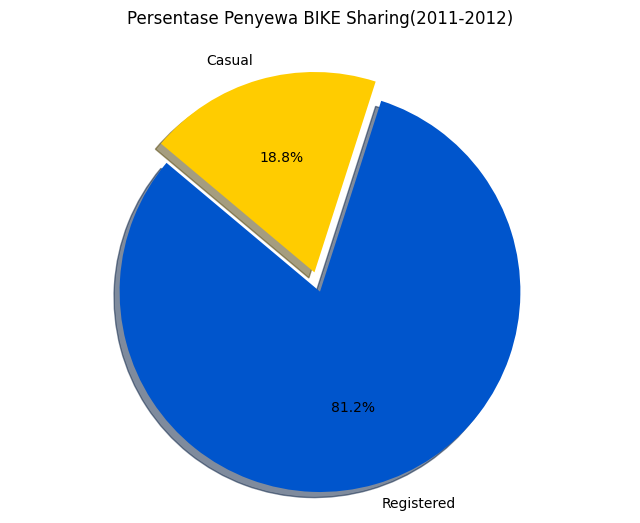

In [26]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
filtered_day_df = day_df[(day_df['dteday'].dt.year >= 2011) & (day_df['dteday'].dt.year <= 2012)]
total_registered_day = filtered_day_df['registered'].sum()
total_casual_day = filtered_day_df['casual'].sum()

hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])
filtered_hour_df = hour_df[(hour_df['dteday'].dt.year >= 2011) & (hour_df['dteday'].dt.year <= 2012)]
total_registered_hour = filtered_hour_df['registered'].sum()
total_casual_hour = filtered_hour_df['casual'].sum()

total_registered = total_registered_day + total_registered_hour
total_casual = total_casual_day + total_casual_hour

labels = ['Registered', 'Casual']
sizes = [total_registered, total_casual]
colors = ['#0055cc','#ffcc00']
explode = (0.1, 0)

plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('Persentase Penyewa BIKE Sharing(2011-2012)', pad=20)
plt.show()

Saya membuat pertanyaan berapa presentase penyewa ini untuk mengetahui presentasi dari penyewa dari tahun 2011 hingga 2012.saya menggabungkan total penyewa (registered dan casual ) dari data day dan hour dari tahun 2011-2012 menggunakan filter data kolom dteday.lalu mendapatkan hasil yaitu

total dari penyewa di tahun 2011-2012 adalah:81,2% registered /pengguna yang terdaftar dan 18,8% pengguna casual


### Pertanyaan 2:

Bagaimana pengaruh hari kerja terhadap jumlah penyewaan sepeda pada tahun 2011-2012?

In [28]:
combined_df = pd.merge(hour_df, day_df, on='dteday', suffixes=('_hour', '_day'))

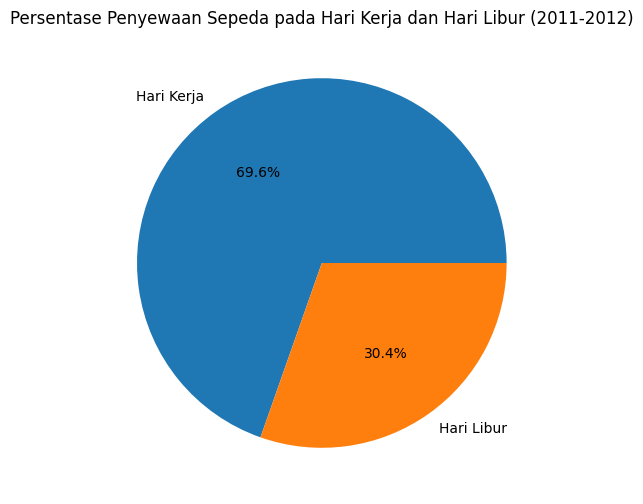

In [32]:
workday_counts = combined_df.groupby('workingday_day')[['registered_day', 'casual_day']].sum()
total_workday = workday_counts['registered_day'][1] + workday_counts['casual_day'][1]
total_holiday = workday_counts['registered_day'][0] + workday_counts['casual_day'][0]
plt.figure(figsize=(8, 6))
plt.pie([total_workday, total_holiday], labels=['Hari Kerja', 'Hari Libur'], colors=['#1f77b4', '#ff7f0e'], autopct='%1.1f%%')
plt.title('Persentase Penyewaan Sepeda pada Hari Kerja dan Hari Libur (2011-2012)')
plt.show()

total penyewa yang menyewa dihari kerja adalah 69,6 % sedangkan penyewa dihari libur hanya 30,4% saja yang menunjukkan bahwa penyewa lebih banyak menyewa dihari kerja

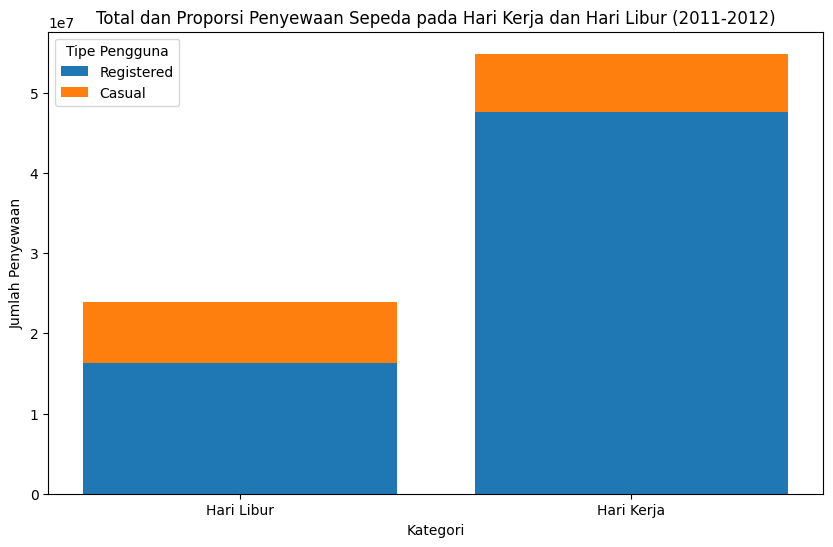

In [31]:
plt.figure(figsize=(10, 6))
plt.bar(workday_counts.index, workday_counts['registered_day'], label='Registered', color='#1f77b4')
plt.bar(workday_counts.index, workday_counts['casual_day'], bottom=workday_counts['registered_day'], label='Casual', color='#ff7f0e')
plt.title('Total dan Proporsi Penyewaan Sepeda pada Hari Kerja dan Hari Libur (2011-2012)')
plt.xlabel('Kategori')
plt.ylabel('Jumlah Penyewaan')
plt.xticks(ticks=[0, 1], labels=['Hari Libur', 'Hari Kerja'])
plt.legend(title='Tipe Pengguna')
plt.show()

untuk total penyewa paling banyak adalah pengguna registered dihari kerja

**Insight:**
- pelanggang paling banyak yang menyewa adalah registered sangat konsisten meskipun di hari kerja atau pun bukan
- pengguna lebih banyak menyewa sepeda di hari kerja daripada hari libur/tidak bekerja
- penyewa terbanyak dan terkonsisten adalah registered

## Analisis Lanjutan (Clustering)

Mengelompokkan penyewa berdasarkan season di holiday dan workday dengan metode manual grouping

In [34]:
def cluster_group(row):
    if row['season_day'] == 1:
        return 'Winter_Workday' if row['workingday_day'] == 1 else 'Winter_Holiday'
    elif row['season_day'] == 2:
        return 'Spring_Workday' if row['workingday_day'] == 1 else 'Spring_Holiday'
    elif row['season_day'] == 3:
        return 'Summer_Workday' if row['workingday_day'] == 1 else 'Summer_Holiday'
    elif row['season_day'] == 4:
        return 'Fall_Workday' if row['workingday_day'] == 1 else 'Fall_Holiday'

combined_df['cluster'] = combined_df.apply(cluster_group, axis=1)

cluster_counts = combined_df.groupby('cluster')[['registered_day', 'casual_day']].sum()
print(cluster_counts)

                registered_day  casual_day
cluster                                   
Fall_Holiday           4590240     1711056
Fall_Workday          12464288     1401445
Spring_Holiday         4373571     2536160
Spring_Workday        12769815     2344525
Summer_Holiday         4887297     2565019
Summer_Workday        15119630     2848857
Winter_Holiday         2506970      770560
Winter_Workday         7231669      669948


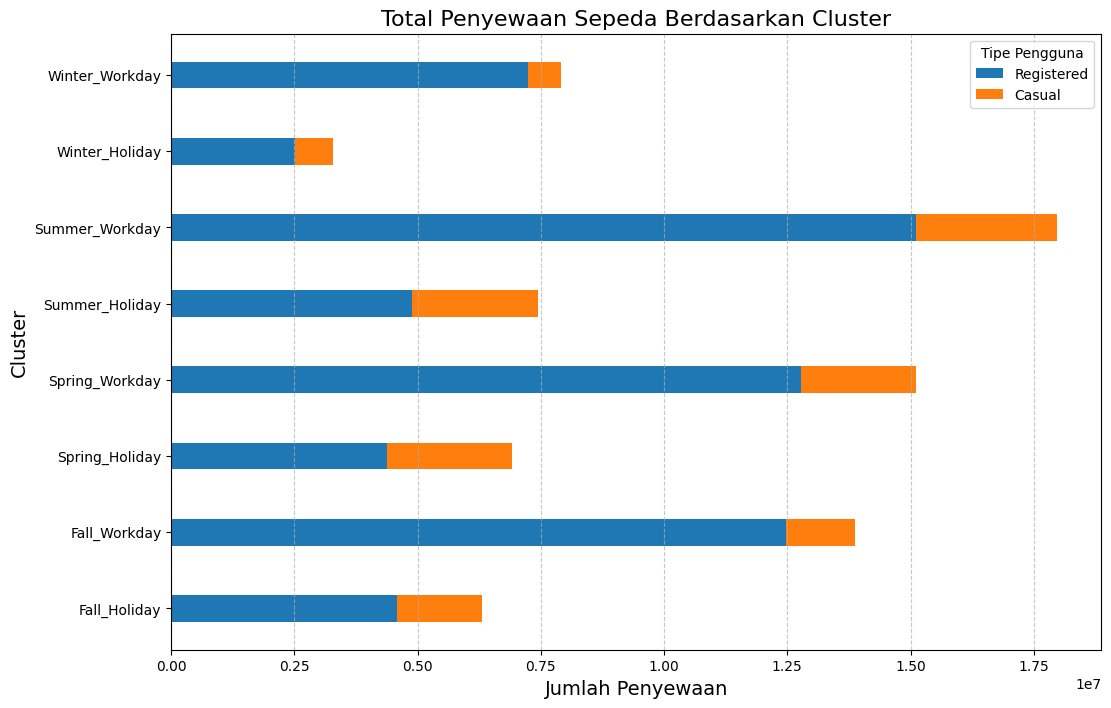

In [35]:
fig, ax = plt.subplots(figsize=(12, 8))
bar_width = 0.35


ax.barh(cluster_counts.index, cluster_counts['registered_day'], height=bar_width, label='Registered', color='#1f77b4')
ax.barh(cluster_counts.index, cluster_counts['casual_day'], height=bar_width, label='Casual', color='#ff7f0e', left=cluster_counts['registered_day'])
ax.set_xlabel('Jumlah Penyewaan', fontsize=14)
ax.set_ylabel('Cluster', fontsize=14)
ax.set_title('Total Penyewaan Sepeda Berdasarkan Cluster', fontsize=16)
ax.legend(title='Tipe Pengguna')

ax.grid(axis='x', linestyle='--', alpha=0.7)

plt.show()

## Conclusion

- Conclution pertanyaan 1

Dari analisis yang dilakukan, diketahui bahwa 81,2% dari total penyewa adalah pengguna terdaftar (registered), sedangkan 18,8% merupakan pengguna casual. Hal ini menunjukkan bahwa mayoritas pengguna yang menyewa sepeda dalam periode tahun 2011-2012 adalah mereka yang terdaftar, menandakan efektivitas sistem pendaftaran dalam menarik pengguna.
- Conclution pertanyaan 2

Dari analisis yang dilakukan, pengguna terdaftar menunjukkan tingkat penyewaan yang sangat konsisten, baik pada hari kerja maupun hari libur. Data menunjukkan bahwa jumlah penyewa lebih banyak pada hari kerja dibandingkan dengan hari libur, mengindikasikan bahwa pengguna terdaftar cenderung lebih aktif menggunakan layanan penyewaan sepeda pada hari kerja, mungkin sebagai alternatif transportasi. Konsistensi tinggi di antara pengguna terdaftar ini juga menunjukkan potensi untuk meningkatkan kualitas pelayanan dan memperkuat program loyalitas guna mempertahankan pengguna tersebut.

In [36]:
day_df.to_csv("day.csv", index=False)

In [37]:
hour_df.to_csv("hour.csv", index=False)